In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=UserWarning)

In [15]:
training_data = pd.read_csv('fashion-mnist_test.csv')
testing_data = pd.read_csv('fashion-mnist_test.csv')
training_data = training_data[0:8000]
testing_data = testing_data[0:2000]
print(training_data.shape)
print(testing_data.shape)

(8000, 785)
(2000, 785)


In [26]:
#splitting the data into X and y
X_train = training_data.drop('label', axis=1)
y_train = training_data['label']
X_test = testing_data.drop('label', axis=1)
y_test = testing_data['label']
print(X_train.shape)

#normalizing
X_train = X_train/255.0
X_test = X_test/255.0

(8000, 784)


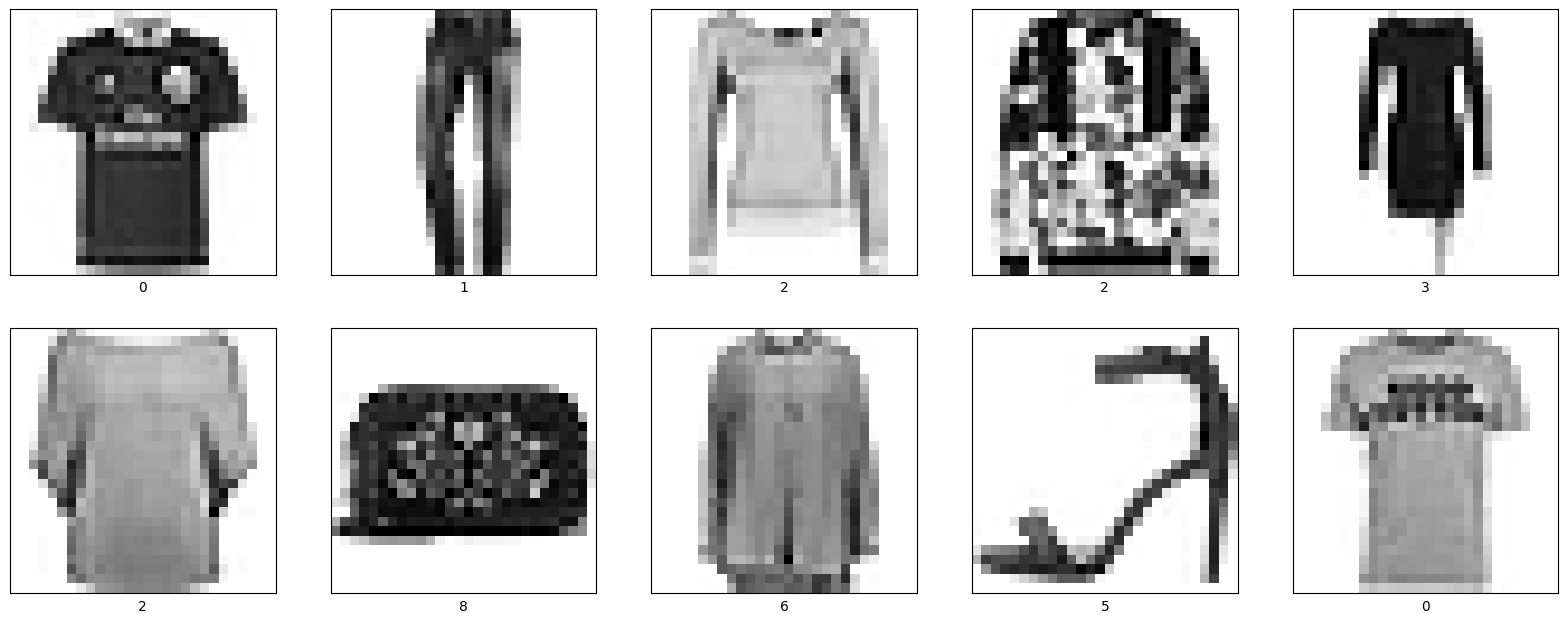

In [17]:
plt.figure(figsize=(20,20))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test.iloc[i,:].values.reshape((28,28)),cmap=plt.cm.binary)
    plt.xlabel(y_test.iloc[i])

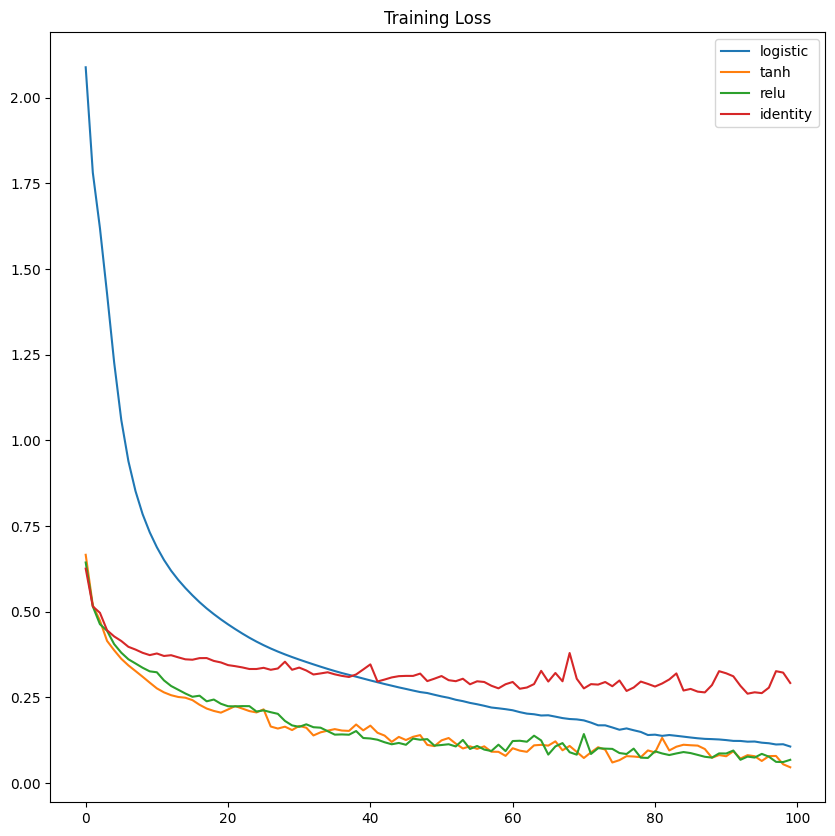

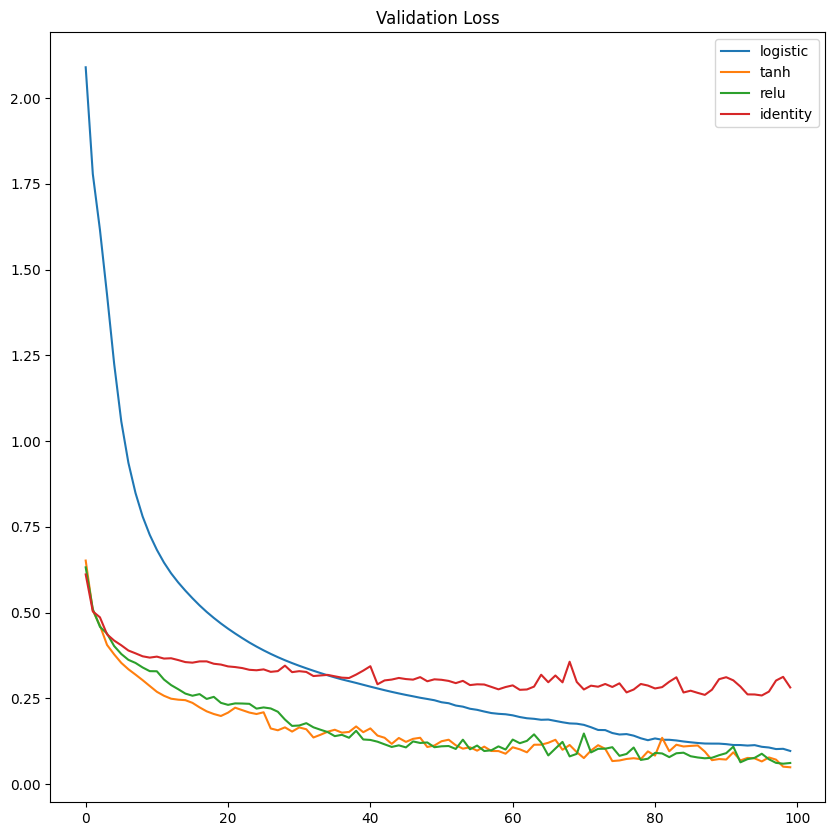

In [18]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss
train_losses = []
val_losses = []
temp = MLPClassifier(activation='logistic', solver='adam', alpha=2e-5, hidden_layer_sizes=(128,64,28), max_iter=1, batch_size=128, random_state=42, warm_start=True)
train_loss = []
val_loss = []
for i in range(100):
    temp.fit(X_train, y_train)
    train_loss.append(log_loss(y_train, temp.predict_proba(X_train)))
    val_loss.append(log_loss(y_test, temp.predict_proba(X_test)))
train_losses.append(train_loss)
val_losses.append(val_loss)

temp = MLPClassifier(activation='tanh', solver='adam', alpha=2e-5, hidden_layer_sizes=(128,64,28), max_iter=1, batch_size=128, random_state=42, warm_start=True)
train_loss = []
val_loss = []
for i in range(100):
    temp.fit(X_train, y_train)
    train_loss.append(log_loss(y_train, temp.predict_proba(X_train)))
    val_loss.append(log_loss(y_test, temp.predict_proba(X_test)))
train_losses.append(train_loss)
val_losses.append(val_loss)

temp = MLPClassifier(activation='relu', solver='adam', alpha=2e-5, hidden_layer_sizes=(128,64,28), max_iter=1, batch_size=128, random_state=42, warm_start=True)
train_loss = []
val_loss = []
for i in range(100):
    temp.fit(X_train, y_train)
    train_loss.append(log_loss(y_train, temp.predict_proba(X_train)))
    val_loss.append(log_loss(y_test, temp.predict_proba(X_test)))
train_losses.append(train_loss)
val_losses.append(val_loss)

temp = MLPClassifier(activation='identity', solver='adam', alpha=2e-5, hidden_layer_sizes=(128,64,28), max_iter=1, batch_size=128, random_state=42, warm_start=True)
train_loss = []
val_loss = []
for i in range(100):
    temp.fit(X_train, y_train)
    train_loss.append(log_loss(y_train, temp.predict_proba(X_train)))
    val_loss.append(log_loss(y_test, temp.predict_proba(X_test)))
train_losses.append(train_loss)
val_losses.append(val_loss)

plt.figure(figsize=(10,10))
plt.plot(train_losses[0], label='logistic')
plt.plot(train_losses[1], label='tanh')
plt.plot(train_losses[2], label='relu')
plt.plot(train_losses[3], label='identity')
plt.legend()
plt.title('Training Loss')
plt.show()

plt.figure(figsize=(10,10))
plt.plot(val_losses[0], label='logistic')
plt.plot(val_losses[1], label='tanh')
plt.plot(val_losses[2], label='relu')
plt.plot(val_losses[3], label='identity')
plt.legend()
plt.title('Validation Loss')
plt.show()

In [19]:
print("logistic",train_losses[0][-1], val_losses[0][-1])
print("tanh",train_losses[1][-1], val_losses[1][-1])
print("relu",train_losses[2][-1], val_losses[2][-1])
print("identity",train_losses[3][-1], val_losses[3][-1])

logistic 0.10672372483331667 0.09672921630323075
tanh 0.04617768176912761 0.049149907887831246
relu 0.0679348893711697 0.061683568231693985
identity 0.2921121110002918 0.28186105726734595


In [20]:
from sklearn.model_selection import GridSearchCV

grid = {
    'solver': ['adam', 'lbfgs', 'sgd'],               
    'learning_rate_init': [2e-3, 2e-4, 2e-5, 2e-6, 2e-7],
    'batch_size': [32, 64, 128, 256],             
}   

mlp = MLPClassifier(activation='tanh', hidden_layer_sizes=(128,64,28), max_iter=1, random_state=42, warm_start=True)
grid_search = GridSearchCV(estimator=mlp, param_grid=grid)

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'batch_size': 64, 'learning_rate_init': 0.002, 'solver': 'adam'}


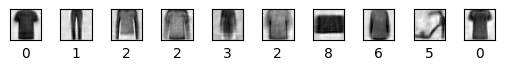

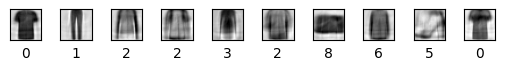

In [23]:
from sklearn.neural_network import MLPRegressor

layer = [128,64,32,64,128]

mlp1 = MLPRegressor(activation='relu', solver='adam', alpha=2e-5, hidden_layer_sizes=layer, max_iter=1, random_state=42, warm_start=True)
mlp2 = MLPRegressor(activation='identity', solver='adam', alpha=2e-5, hidden_layer_sizes=layer, max_iter=1, random_state=42, warm_start=True)

for i in range(100):
    mlp1.fit(X_train, X_train)
    mlp2.fit(X_train, X_train)


for i in range(10):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(mlp1.predict(X_test.iloc[i,:].values.reshape(1,-1)).reshape((28,28)),cmap=plt.cm.binary)
    plt.xlabel(y_test.iloc[i])
plt.show()

for i in range(10):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(mlp2.predict(X_test.iloc[i,:].values.reshape(1,-1)).reshape((28,28)),cmap=plt.cm.binary)
    plt.xlabel(y_test.iloc[i])
plt.show()

In [22]:
from sklearn.neural_network import MLPClassifier

